## **Research Problem**

**Problem**
> Determining the outcomes of a match

**Success Metric**
> Prediction accuracy of 85%

**Context**
> Sports gambling has been on the rise and has turned out to be a booming business. In order to maximize profits businesses involved in this nature of business should consider

**Experimental Design**
1.   Load data and preview preliminary characteristics
2.   Data Cleaning (check for and deal with outliers, anomalies and missing data)
3. Exploratory Analysis
4. Implementing the Solution
5. Challenging the Solution
6. Follow Up Questions



        
        
        
        
        
        



**Data Relevance**

## Reading and Checking the Dataset

In [151]:
# Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
import scipy as sp

from sklearn.preprocessing import LabelEncoder # For encoding purposes
from sklearn.preprocessing import PolynomialFeatures, StandardScaler # For use in polynomial regression
from sklearn.model_selection import train_test_split, GridSearchCV, LeaveOneOut # For splitting the dataset
from sklearn.linear_model import LinearRegression, LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [52]:
# Loading the Dataset
rank = pd.read_csv('fifa_ranking.csv')
results = pd.read_csv('results.csv')

In [53]:
# Number of records
print(rank.shape)
print(results.shape)

(57793, 16)
(40839, 9)


* The **fifa ranking** data has 57,793 rows and 16 columns
* The **match results** data has 40,839 rows and 9 columns

In [54]:
# Previewing the top and bottom of the RANK data
print("Fifa Ranking Data")
print("TOP DATA")
print(rank.head())
print("\nBOTTOM DATA")
print(rank.tail())

Fifa Ranking Data
TOP DATA
   rank country_full  ... confederation   rank_date
0     1      Germany  ...          UEFA  1993-08-08
1     2        Italy  ...          UEFA  1993-08-08
2     3  Switzerland  ...          UEFA  1993-08-08
3     4       Sweden  ...          UEFA  1993-08-08
4     5    Argentina  ...      CONMEBOL  1993-08-08

[5 rows x 16 columns]

BOTTOM DATA
       rank country_full  ... confederation   rank_date
57788   206     Anguilla  ...      CONCACAF  2018-06-07
57789   206      Bahamas  ...      CONCACAF  2018-06-07
57790   206      Eritrea  ...           CAF  2018-06-07
57791   206      Somalia  ...           CAF  2018-06-07
57792   206        Tonga  ...           OFC  2018-06-07

[5 rows x 16 columns]


In [55]:
# Previewing the top and bottom of the RANK data
print("Match Result Data")
print("TOP DATA")
print(results.head())
print("\nBOTTOM DATA")
print(results.tail())

Match Result Data
TOP DATA
         date home_team away_team  ...     city   country neutral
0  1872-11-30  Scotland   England  ...  Glasgow  Scotland   False
1  1873-03-08   England  Scotland  ...   London   England   False
2  1874-03-07  Scotland   England  ...  Glasgow  Scotland   False
3  1875-03-06   England  Scotland  ...   London   England   False
4  1876-03-04  Scotland   England  ...  Glasgow  Scotland   False

[5 rows x 9 columns]

BOTTOM DATA
             date         home_team  ... country  neutral
40834  2019-07-18    American Samoa  ...   Samoa     True
40835  2019-07-18              Fiji  ...   Samoa     True
40836  2019-07-19           Senegal  ...   Egypt     True
40837  2019-07-19        Tajikistan  ...   India     True
40838  2019-07-20  Papua New Guinea  ...   Samoa     True

[5 rows x 9 columns]


In [56]:
# Checking the appropriateness datatype
print("Fifa Ranking Data Types")
print(rank.dtypes)

print("\nMatch Results Data Types")
print(results.dtypes)

Fifa Ranking Data Types
rank                         int64
country_full                object
country_abrv                object
total_points               float64
previous_points              int64
rank_change                  int64
cur_year_avg               float64
cur_year_avg_weighted      float64
last_year_avg              float64
last_year_avg_weighted     float64
two_year_ago_avg           float64
two_year_ago_weighted      float64
three_year_ago_avg         float64
three_year_ago_weighted    float64
confederation               object
rank_date                   object
dtype: object

Match Results Data Types
date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object


* In the **fifa ranking** dataset the rank_data column should be converted to be of type **datetime**
* In the **Match Results** dataset the data column should be converted to **datetime**

## Tidying the Dataset

In [57]:
# Changing the dates to datetype
rank['rank_date'] = pd.to_datetime(rank['rank_date'])
results['date'] = pd.to_datetime(results['date'])

In [58]:
# Rechecking the data types
print(rank.dtypes)
print('')
print(results.dtypes)

rank                                int64
country_full                       object
country_abrv                       object
total_points                      float64
previous_points                     int64
rank_change                         int64
cur_year_avg                      float64
cur_year_avg_weighted             float64
last_year_avg                     float64
last_year_avg_weighted            float64
two_year_ago_avg                  float64
two_year_ago_weighted             float64
three_year_ago_avg                float64
three_year_ago_weighted           float64
confederation                      object
rank_date                  datetime64[ns]
dtype: object

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object


* **Joining the two data frames** along the common columns
* FIFA rankings changes with each passing match as compared to the previous method of updating the rankings **once every month** on a particular date. The points which will be deducted or added will partially be calculated by factoring in the relative strength of the two opponents. *This implies that we will consentrate on year and month as joining factors*

In [59]:
# Comparing common columns that are common
rank.country_full.unique()[:20]

array(['Germany', 'Italy', 'Switzerland', 'Sweden', 'Argentina',
       'Republic of Ireland', 'Russia', 'Brazil', 'Norway', 'Denmark',
       'England', 'France', 'Spain', 'Mexico', 'RCS', 'Netherlands',
       'Nigeria', 'Belgium', 'Colombia', 'Poland'], dtype=object)

In [60]:
results.country.unique()[:20]

array(['Scotland', 'England', 'Wales', 'Republic of Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Bohemia', 'Switzerland',
       'Sweden', 'Germany', 'Italy', 'Chile', 'Norway', 'Finland'],
      dtype=object)

* FIFA rankings will now change with each passing match as compared to the previous method of updating the rankings once every month on a particular date. The points which will be deducted or added will partially be calculated by factoring in the relative strength of the two opponents.

In [61]:
# For the dates column it would be best to work with year to find the rank
# Creating a year_month columns
rank['month_year'] = pd.to_datetime(rank['rank_date']).dt.to_period('M')
results['month_year'] = pd.to_datetime(results['date']).dt.to_period('M')

In [62]:
rank.month_year.unique()

<PeriodArray>
['1993-08', '1993-09', '1993-10', '1993-11', '1993-12', '1994-02', '1994-03',
 '1994-04', '1994-05', '1994-06',
 ...
 '2017-09', '2017-10', '2017-11', '2017-12', '2018-01', '2018-02', '2018-03',
 '2018-04', '2018-05', '2018-06']
Length: 285, dtype: period[M]

In [63]:
# Dropping unneccessary columns from the fifa ranking dataset
rank = rank.drop(columns=['country_abrv', 'total_points', 'previous_points','rank_change', 'cur_year_avg',
       'cur_year_avg_weighted', 'last_year_avg', 'last_year_avg_weighted',
       'two_year_ago_avg', 'two_year_ago_weighted', 'three_year_ago_avg',
       'three_year_ago_weighted'])

In [64]:
# Previewing rank data
rank.head()

,rank,country_full,confederation,rank_date,month_year
0,1,Germany,UEFA,1993-08-08,1993-08
1,2,Italy,UEFA,1993-08-08,1993-08
2,3,Switzerland,UEFA,1993-08-08,1993-08
3,4,Sweden,UEFA,1993-08-08,1993-08
4,5,Argentina,CONMEBOL,1993-08-08,1993-08


In [65]:
results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,month_year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872-11
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873-03
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874-03
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875-03
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876-03


* In the final joined dataset, we need ranks of both the home team and the away team.
* We will drop the city and the country that the game was played from the **results** dataframe as **column neutral** will determine whether the game was in a neutral ground or not

In [66]:
# Dropping the unnecessary columns from the results data frame
results = results.drop(columns=['city', 'country','date'])

In [67]:
# Previewing the data
results.head()

,home_team,away_team,home_score,away_score,tournament,neutral,month_year
0,Scotland,England,0,0,Friendly,False,1872-11
1,England,Scotland,4,2,Friendly,False,1873-03
2,Scotland,England,2,1,Friendly,False,1874-03
3,England,Scotland,2,2,Friendly,False,1875-03
4,Scotland,England,3,0,Friendly,False,1876-03


In [68]:
# Exploring the confederation from the rank data
# And the tournament from the results data
print('RANK DATASET')
print(rank.confederation.unique())
print('\nRESULT DATASET')
print(results.tournament.unique())

RANK DATASET
['UEFA' 'CONMEBOL' 'CONCACAF' 'CAF' 'AFC' 'OFC']

RESULT DATASET
['Friendly' 'British Championship' 'Copa Lipton' 'Copa Newton'
 'Copa Premio Honor Argentino' 'Copa Premio Honor Uruguayo' 'Copa Roca'
 'Copa América' 'Copa Chevallier Boutell' 'Nordic Championship'
 'International Cup' 'Baltic Cup' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'CCCF Championship'
 'NAFU Championship' 'Copa Oswaldo Cruz' 'Pan American Championship'
 'Copa del Pacífico' "Copa Bernardo O'Higgins"
 'AFC Asian Cup qualification' 'Atlantic Cup' 'AFC Asian Cup'
 'African Cup of Nations' 'Copa Paz del Chaco' 'Merdeka Tournament'
 'UEFA Euro qualification' 'UEFA Euro' 'Windward Islands Tournament'
 'African Cup of Nations qualification' 'Vietnam Independence Cup'
 'Copa Carlos Dittborn' 'CONCACAF Championship' 'Copa Juan Pinto Durán'
 'UAFA Cup' 'South Pacific Games' 'CONCACAF Championship qualification'
 'Copa Artigas' 'GaNEFo' "King's Cup" 'Gulf Cup' 'Indonesia Tou

Clearly, FIFA considers only the following matches:
* **UEFA** - Union of European Football Association
* **CONMEBOL** - The South American Football Confederation
* **CONCACAF** - Confederation of North, Central America and Carribean Association Footbal
* **CAF** - Confederation of African Football
* **AFC** - Asian Football Confederation
* **OFC** - Oceania Football Confederation

> We shall match up these championships with those in the results dataset

### Merging Data

In [69]:
# Previewing the columns in each case
print(rank.columns)
print('')
print(results.columns) 

Index(['rank', 'country_full', 'confederation', 'rank_date', 'month_year'], dtype='object')

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'month_year'],
      dtype='object')


In [70]:
# We will start from the home team to add its rank
# Then away team 
# Then join home team and away team data
start_away_team = pd.merge(results, rank, left_on=['away_team', 'month_year'],
                     right_on= ['country_full', 'month_year'], how = 'inner')

start_away_team.head()

,home_team,away_team,home_score,away_score,tournament,neutral,month_year,rank,country_full,confederation,rank_date
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,Paraguay,CONMEBOL,1993-08-08
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,Paraguay,CONMEBOL,1993-08-08
2,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993-08,5,Argentina,CONMEBOL,1993-08-08
3,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993-08,5,Argentina,CONMEBOL,1993-08-08
4,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993-08,5,Argentina,CONMEBOL,1993-08-08


In [71]:
# Renaming the rank column to away_team_rank
start_away_team.rename(columns={'rank' : 'away_team_rank'}, inplace=True)
start_away_team.head()

,home_team,away_team,home_score,away_score,tournament,neutral,month_year,away_team_rank,country_full,confederation,rank_date
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,Paraguay,CONMEBOL,1993-08-08
1,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,Paraguay,CONMEBOL,1993-08-08
2,Peru,Argentina,0,1,FIFA World Cup qualification,False,1993-08,5,Argentina,CONMEBOL,1993-08-08
3,Paraguay,Argentina,1,3,FIFA World Cup qualification,False,1993-08,5,Argentina,CONMEBOL,1993-08-08
4,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993-08,5,Argentina,CONMEBOL,1993-08-08


In [72]:
# Adding the home team rank
final_data = pd.merge(start_away_team, rank, left_on=['home_team', 'month_year'],
                     right_on= ['country_full', 'month_year'], how = 'inner')

final_data.head()

,home_team,away_team,home_score,away_score,tournament,neutral,month_year,away_team_rank,country_full_x,confederation_x,rank_date_x,rank,country_full_y,confederation_y,rank_date_y
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,Paraguay,CONMEBOL,1993-08-08,19,Colombia,CONMEBOL,1993-08-08
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993-08,5,Argentina,CONMEBOL,1993-08-08,19,Colombia,CONMEBOL,1993-08-08
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,1993-08,70,Peru,CONMEBOL,1993-08-08,19,Colombia,CONMEBOL,1993-08-08
3,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,Paraguay,CONMEBOL,1993-08-08,5,Argentina,CONMEBOL,1993-08-08
4,Argentina,Peru,2,1,FIFA World Cup qualification,False,1993-08,70,Peru,CONMEBOL,1993-08-08,5,Argentina,CONMEBOL,1993-08-08


In [73]:
# Renaming a column
final_data.rename(columns={'rank' : 'home_team_rank'}, inplace=True)
final_data.head()

,home_team,away_team,home_score,away_score,tournament,neutral,month_year,away_team_rank,country_full_x,confederation_x,rank_date_x,home_team_rank,country_full_y,confederation_y,rank_date_y
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,Paraguay,CONMEBOL,1993-08-08,19,Colombia,CONMEBOL,1993-08-08
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993-08,5,Argentina,CONMEBOL,1993-08-08,19,Colombia,CONMEBOL,1993-08-08
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,1993-08,70,Peru,CONMEBOL,1993-08-08,19,Colombia,CONMEBOL,1993-08-08
3,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,Paraguay,CONMEBOL,1993-08-08,5,Argentina,CONMEBOL,1993-08-08
4,Argentina,Peru,2,1,FIFA World Cup qualification,False,1993-08,70,Peru,CONMEBOL,1993-08-08,5,Argentina,CONMEBOL,1993-08-08


In [74]:
# Dropping the unnecessary columns
final_data = final_data.drop(columns=['country_full_x','rank_date_x','country_full_y','rank_date_y','confederation_x','confederation_y'])

In [75]:
final_data.head()

,home_team,away_team,home_score,away_score,tournament,neutral,month_year,away_team_rank,home_team_rank
0,Colombia,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,19
1,Colombia,Argentina,2,1,FIFA World Cup qualification,False,1993-08,5,19
2,Colombia,Peru,4,0,FIFA World Cup qualification,False,1993-08,70,19
3,Argentina,Paraguay,0,0,FIFA World Cup qualification,False,1993-08,67,5
4,Argentina,Peru,2,1,FIFA World Cup qualification,False,1993-08,70,5


In [76]:
# Checking for any duplicates 
final_data.duplicated().any()

True

* There are duplicate values that need to be removed

In [77]:
# Dropping the duplicates
final_data.drop_duplicates(keep = 'first', inplace=True)

In [78]:
# Checking the sahape of the data
final_data.shape

(16864, 9)

In [79]:
# Checking for presence of missing data
final_data.isnull().any().any()

False

* No missing value in our final dataframe

### Outliers Check

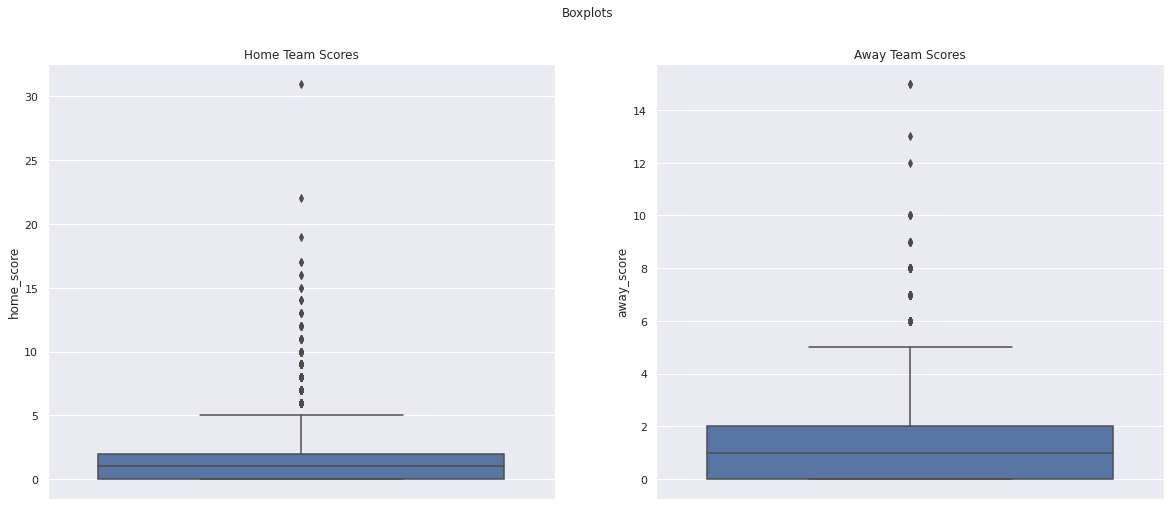

In [80]:
# Checking for outliers using boxplots
fig, ax = plt.subplots(1,2, figsize=(20,8))
fig.suptitle('Boxplots')
sns.boxplot(data=final_data, y = "home_score", ax=ax[0])
ax[0].set_title('Home Team Scores')
sns.boxplot(data=final_data, y = "away_score", ax=ax[1])
ax[1].set_title('Away Team Scores')

plt.show()

> Home Teams have more instances where they have scored abnormally high goals than away teams 

## Exploratory Data Analysis

### Univariate Analysis

#### Home_team Column

In [81]:
final_data.columns

Index(['home_team', 'away_team', 'home_score', 'away_score', 'tournament',
       'neutral', 'month_year', 'away_team_rank', 'home_team_rank'],
      dtype='object')

In [82]:
# Country that has hosted most Home Games
final_data.home_team.value_counts()[:10]

Mexico                  252
Saudi Arabia            211
Japan                   206
Oman                    195
Qatar                   185
United Arab Emirates    177
Brazil                  176
South Africa            175
Egypt                   174
France                  173
Name: home_team, dtype: int64

In [83]:
# Countries that have hosted least Home Games
final_data.home_team.value_counts()[::-1][:10]


Turks and Caicos Islands     3
Anguilla                     6
Gibraltar                    6
Montserrat                   8
Kosovo                       8
Cook Islands                 9
Chinese Taipei               9
Bahamas                     11
Mongolia                    13
American Samoa              14
Name: home_team, dtype: int64

* Mexico has hosted most home games
* The Turks and Caicos Island has hosted the least games

#### Away Team Column

In [84]:
# Country that has Travelled MOST Number of times to other countries
final_data.away_team.value_counts()[:10]

Zambia        189
Sweden        163
Finland       160
Paraguay      160
Brazil        159
Uruguay       158
Costa Rica    156
Colombia      156
Iraq          153
Ghana         153
Name: away_team, dtype: int64

In [85]:
# Countries that have Travelled least Number of times to other countries
final_data.away_team.value_counts()[::-1][:10]

Montserrat                   6
Gibraltar                    6
Kosovo                       6
Turks and Caicos Islands     8
Bahamas                     13
American Samoa              13
South Sudan                 14
Samoa                       15
Curaçao                     17
Anguilla                    17
Name: away_team, dtype: int64

* Zambia has travelled the most number of times to play away matches
* Montserrat has traved the least number of times for away team

#### Home Score and Away Score Distribution

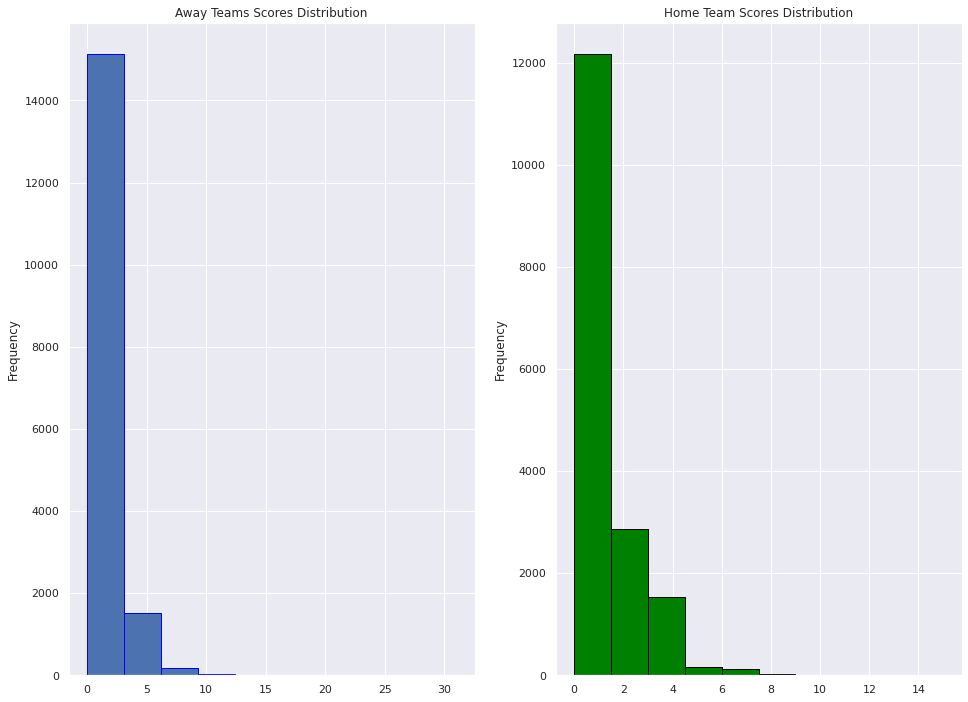

In [86]:
# Histograms to visualize the Distribution

fig, ax=plt.subplots(1,2, figsize=(16,12))

final_data['home_score'].plot.hist(ax=ax[0], bins=10, edgecolor='blue')
ax[1].set_title('Home Team Scores Distribution')

final_data['away_score'].plot.hist(ax=ax[1], bins=10, edgecolor='black', color='green')
ax[0].set_title('Away Teams Scores Distribution')

plt.show()

In [87]:
# Measures of Central Tendencies
# HOME TEAM
print('Home Team Average Score: ' + str(final_data.home_score.mean()))
print('Home Team Median Score: ' + str(final_data.home_score.median()))
print('Home Team Modal Score: ' + str(final_data.home_score.mode()))

Home Team Average Score: 1.6046015180265654
Home Team Median Score: 1.0
Home Team Modal Score: 0    1
dtype: int64


* Home Team Score is BIMODAL

In [88]:
# HOME TEAM
print('Home Team Average Score: ' + str(final_data.away_score.mean()))
print('Home Team Median Score: ' + str(final_data.away_score.median()))
print('Home Team Modal Score:' + str(final_data.away_score.mode()))

Home Team Average Score: 1.0696157495256167
Home Team Median Score: 1.0
Home Team Modal Score:0    0
dtype: int64


#### Tournaments

In [89]:
# Top played Tournaments
final_data.tournament.value_counts()[:10]

Friendly                                6408
FIFA World Cup qualification            3950
UEFA Euro qualification                 1383
African Cup of Nations qualification     871
AFC Asian Cup qualification              387
CECAFA Cup                               309
African Cup of Nations                   278
Copa América                             225
COSAFA Cup                               222
African Nations Championship             186
Name: tournament, dtype: int64

* Friendly games are the most played worldover among nations

In [90]:
# Least Played Tournaments
final_data.tournament.value_counts()[::-1][:10]

Copa América qualification     2
SKN Football Festival          2
Copa del Pacífico              4
OSN Cup                        4
Dragon Cup                     4
Copa Paz del Chaco             5
VFF Cup                        5
Windward Islands Tournament    6
Nations Cup                    6
Tournoi de France              6
Name: tournament, dtype: int64

* Copa America qualification is the least played tournament for this dataset

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


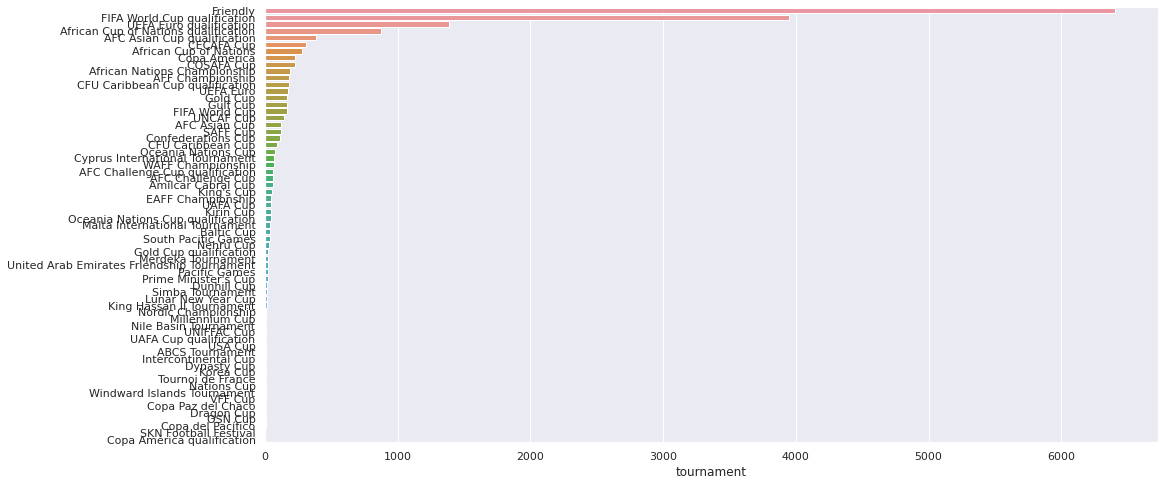

In [91]:
# Investigate types of tournaments
plt.figure(figsize=(16,8))
sns.barplot(final_data.tournament.value_counts(), final_data.tournament.value_counts().index)

#### Neutral

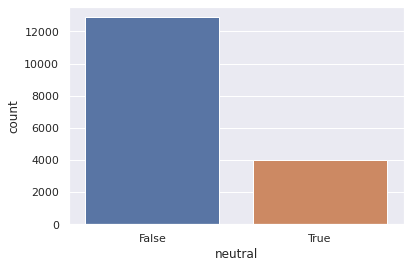

In [92]:
sns.set(style='darkgrid')
sns.countplot(x = 'neutral', data = final_data, order = final_data['neutral'].value_counts().index)
plt.show()

* Most of the games were played in non-neutral ground

### Bivariate Analysis

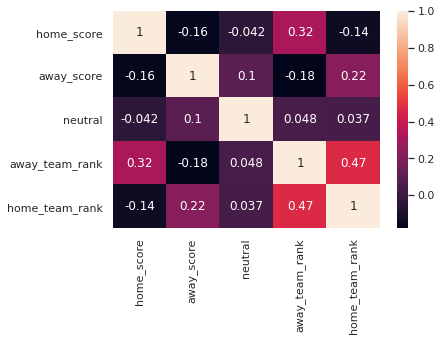

In [93]:
# Pearson correlation coefficient 
sns.heatmap(final_data.corr(),annot=True)
plt.show()

## Implementation

As an implementation, two approaches shall be considered:

**Approach 1: Polynomial approach** - Here the following features shall be trained:
* Rank of home team
* Rank of away team
* Tournament type

Two models shall then be made:
1. **Model 1:** Predict how many goals the home team scores.
2. **Model 2:** Predict how many goals the away team scores.

**Approach 2: Logistic approach** - Here Feature Engineering shall be performed to figure out from the home team’s perspective if the game is a Win, Lose or Draw (W, L, D)

### Approach 1

In [94]:
# Extracting data for the use in Approach 1
polynomial_df = final_data[['home_score', 'away_score', 'tournament','away_team_rank', 'home_team_rank']]

In [95]:
# Previewing the data subset
polynomial_df.head()

,home_score,away_score,tournament,away_team_rank,home_team_rank
0,0,0,FIFA World Cup qualification,67,19
1,2,1,FIFA World Cup qualification,5,19
2,4,0,FIFA World Cup qualification,70,19
3,0,0,FIFA World Cup qualification,67,5
4,2,1,FIFA World Cup qualification,70,5


In [96]:
# Encoding the tournament column
# instatiating the LabelEncoder
le = LabelEncoder()

polynomial_df['tournament'] = le.fit_transform(polynomial_df['tournament'])

polynomial_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,home_score,away_score,tournament,away_team_rank,home_team_rank
0,0,0,26,67,19
1,2,1,26,5,19
2,4,0,26,70,19
3,0,0,26,67,5
4,2,1,26,70,5


#### Model 1: **Predicting how many goals the home team scores**

In [97]:
# Determining the the variables for Home Team

# Features
X1 = polynomial_df[['tournament', 'away_team_rank', 'home_team_rank']]

# Dependent Variable
y1 = polynomial_df[['home_score']]

In [98]:
# Splitting the dataset into training and test sets
X_train, Y_train, X_test, Y_test = train_test_split(X1, y1, test_size=0.2, random_state=0)

In [99]:
# Fitting the polynomial Regression Model
poly_reg = PolynomialFeatures(degree=2)
X_poly1 = poly_reg.fit_transform(X1)

pol_reg = LinearRegression()
pol_reg.fit(X_poly1, y1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [101]:
# Making prediction
y_pred = pol_reg.predict(X_test)

ValueError: ignored

In [ ]:
# checking a sample of the predictions 
pred_df = pd.DataFrame({'y_predicted': y_pred, 'y_test': y_test})
df_pred.sample(5)

#### Model 1: **Predicting how many goals the away team scores**

In [136]:
# Features
X2 = polynomial_df[['tournament', 'away_team_rank', 'home_team_rank']]

# Dependent Variable
y2 = polynomial_df[['away_score']]

In [138]:
X2.head()

,tournament,away_team_rank,home_team_rank
0,26,67,19
1,26,5,19
2,26,70,19
3,26,67,5
4,26,70,5


In [137]:
# Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 4)

In [142]:
# scaling the train and test sets
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [143]:
# fitting the polynomial regression to the dataset
poly_features = PolynomialFeatures(degree = 2)
X_train = poly_features.fit_transform(X_train)
X_test = poly_features.fit_transform(X_test)

In [145]:
# Model Training
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [146]:
# Making Predictions
y_pred = regressor.predict(X_test)

In [148]:
# assess the accuraccy of the model

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.8377018755854692
Mean Squared Error: 1.2797161129633705
Root Mean Squared Error: 1.131245381410846


#### Cross Validation: LeaveOneOut Approach

In [149]:
# Features
X = polynomial_df[['tournament', 'away_team_rank', 'home_team_rank']]

# Dependent Variable
y = polynomial_df[['away_score']]

In [159]:
folds = LeaveOneOut()

In [160]:
folds.get_n_splits(X)

16864

In [ ]:
# Assessing the Model
RMSES = []
count = 0
for train_index, test_index in folds.split(X):
  print("TRAIN:", train_index, "TEST:", test_index)
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  # fitting the polynomial regression model
  poly_regressor = PolynomialFeatures(degree = 1)    
  x_reg = poly_regressor.fit_transform(x_train)      

  #applying polynomial feature to linear regression
  pol_reg = LinearRegression()                          
  pol_reg.fit(x_reg, y_train)

  # making predictions
  y_pred = pol_reg.predict(poly_regressor.fit_transform(x_test))

  # assessing the accuracy of the model
  rmse_value = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append (rmse_value)

  count = count + 1

print('Trained '+str(count) + ' models')
print('The Mean of the RMSES is: ' + str (np.mean(RMSES)))

### Approach 2: Logistic Regression

In [106]:
# Creating our logistic DataFrame
logistic_df = final_data[['home_score', 'away_score', 'tournament', 'away_team_rank', 'home_team_rank']]
logistic_df.head()

,home_score,away_score,tournament,away_team_rank,home_team_rank
0,0,0,FIFA World Cup qualification,67,19
1,2,1,FIFA World Cup qualification,5,19
2,4,0,FIFA World Cup qualification,70,19
3,0,0,FIFA World Cup qualification,67,5
4,2,1,FIFA World Cup qualification,70,5


In [107]:
# Encoding the tournament column
le = LabelEncoder()
logistic_df['tournament'] = le.fit_transform(logistic_df['tournament'])
logistic_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,home_score,away_score,tournament,away_team_rank,home_team_rank
0,0,0,26,67,19
1,2,1,26,5,19
2,4,0,26,70,19
3,0,0,26,67,5
4,2,1,26,70,5


In [108]:
# Feature engineering creating column dipcting a WIN, DRAW or LOSS
conditions = [logistic_df['home_score'] > logistic_df['away_score'],
              logistic_df['home_score'] < logistic_df['away_score'],
              logistic_df['home_score'] == logistic_df['away_score']]

# Values
values = ['WIN', 'LOSS', 'DRAW']

# Inserting a new column
logistic_df['results'] = np.select(conditions, values)

logistic_df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,home_score,away_score,tournament,away_team_rank,home_team_rank,results
0,0,0,26,67,19,DRAW
1,2,1,26,5,19,WIN
2,4,0,26,70,19,WIN
3,0,0,26,67,5,DRAW
4,2,1,26,70,5,WIN


Since this is a Classification Problem, there is no need of numerical values for the results

In [109]:
# Features
X = logistic_df.drop(['results'],axis=1)

# Dependent variable
y = logistic_df['results']

In [111]:
# Training and Testing Dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=25)

In [115]:
# Fitting the model
logistic = LogisticRegression()
logistic.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# Making a Prediction
y_predicted = logistic.predict(X_test)

In [120]:
# Comparing the Results
pd.DataFrame({'y_predicted': y_predicted, 'y_test': y_test})[:10]

,y_predicted,y_test
16084,DRAW,DRAW
10253,LOSS,LOSS
5799,WIN,WIN
9424,LOSS,LOSS
3858,DRAW,DRAW
8279,LOSS,LOSS
1702,LOSS,LOSS
13005,WIN,WIN
10829,DRAW,DRAW
12314,LOSS,LOSS


In [125]:
# Model Accuracy
accuracy = accuracy_score(y_test, y_predicted)
print('Accuracy: ', accuracy)

Accuracy:  1.0


In [126]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_predicted)
print(conf_matrix)

[[ 807    0    0]
 [   0  950    0]
 [   0    0 1616]]


> The confusion matrix results indicate that all the predictions are correct

#### Hyperparameter tuning through GRID SEARCH

In [127]:
# Creating regularization penalty space
penalty = ['l0', 'l2']

In [128]:
# Creating regularization hyperparameter space
C = np.logspace(0, 4, 10)

In [129]:
# Creating hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

In [132]:
# Creating grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=3, verbose=0)

In [134]:
# Fitting grid search
best_model = clf.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Logistic Regression supports only penalties in ['l1', 'l2', 'elasticnet', 'none'], got l0.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

In [135]:
# Previewing best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


* The best model is 12

## Observations

* Logistic Regression gives higher performances compared to the Polynomial Regression Model
* When considering a WIN, DRAW or LOSS as the labels then the problem becomes a classification problem therefore a Logistic Regression Model is best.
* When considering the number of goals scored by each team then Polynomial Regression is best